In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pt 

In [2]:
dataset=pd.read_csv("crime_dataset_india.csv")

In [3]:
dataset.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [4]:
dataset.drop(['Report Number','Time of Occurrence'],axis=1,inplace=True)

In [5]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,02-01-2020 00:00,01-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,01-01-2020 19:00,01-01-2020 01:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,02-01-2020 05:00,01-01-2020 02:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,01-01-2020 05:00,01-01-2020 03:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,01-01-2020 21:00,01-01-2020 04:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [6]:
dataset.isna().sum()

Date Reported             0
Date of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used            5790
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [7]:
mode=dataset['Weapon Used'].mode()[0]

In [8]:
print(mode)

Knife


In [9]:
dataset['Weapon Used'].fillna(mode,inplace=True)

C:\Users\vishn\AppData\Local\Temp\ipykernel_22168\2426714831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Weapon Used'].fillna(mode,inplace=True)


In [10]:
dataset.isna().sum()

Date Reported             0
Date of Occurrence        0
City                      0
Crime Code                0
Crime Description         0
Victim Age                0
Victim Gender             0
Weapon Used               0
Crime Domain              0
Police Deployed           0
Case Closed               0
Date Case Closed      20098
dtype: int64

In [11]:
dataset.tail(3)

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40157,02-08-2024 03:00,07-31-2024 05:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,01-08-2024 19:00,07-31-2024 06:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN
40159,31-07-2024 17:00,07-31-2024 07:00,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,28-09-2024 17:00


In [12]:
dataset['Date Reported']=pd.to_datetime(dataset['Date Reported'],format='%d-%m-%Y %H:%M')

In [13]:
dataset['Date of Occurrence']=dataset['Date of Occurrence'].str.strip()

In [14]:
dataset['Date of Occurrence']=pd.to_datetime(dataset['Date of Occurrence'],format='%m-%d-%Y %H:%M')

In [15]:
def find(x):
    if pd.isna(x):
        return pd.NaT
    else:
        return pd.to_datetime(x,format='%d-%m-%Y %H:%M')

In [16]:
dataset['Date Case Closed']=dataset['Date Case Closed'].apply(find)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date Reported       40160 non-null  datetime64[ns]
 1   Date of Occurrence  40160 non-null  datetime64[ns]
 2   City                40160 non-null  object        
 3   Crime Code          40160 non-null  int64         
 4   Crime Description   40160 non-null  object        
 5   Victim Age          40160 non-null  int64         
 6   Victim Gender       40160 non-null  object        
 7   Weapon Used         40160 non-null  object        
 8   Crime Domain        40160 non-null  object        
 9   Police Deployed     40160 non-null  int64         
 10  Case Closed         40160 non-null  object        
 11  Date Case Closed    20062 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(6)
memory usage: 3.7+ MB


In [18]:
dataset.tail(4)

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40156,2024-07-31 14:00:00,2024-07-31 04:00:00,Mumbai,300,ILLEGAL POSSESSION,75,F,Knife,Other Crime,2,Yes,2024-09-29 14:00:00
40157,2024-08-02 03:00:00,2024-07-31 05:00:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT
40158,2024-08-01 19:00:00,2024-07-31 06:00:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT
40159,2024-07-31 17:00:00,2024-07-31 07:00:00,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,2024-09-28 17:00:00


In [19]:
dataset['Case Closed'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
dataset['Date Case Closed']=np.where(
    dataset['Case Closed']=='Yes',
    (dataset['Date Case Closed']-dataset['Date Reported']).dt.days,
    9999
)

In [21]:
dataset.tail(4)

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
40156,2024-07-31 14:00:00,2024-07-31 04:00:00,Mumbai,300,ILLEGAL POSSESSION,75,F,Knife,Other Crime,2,Yes,60.0
40157,2024-08-02 03:00:00,2024-07-31 05:00:00,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,9999.0
40158,2024-08-01 19:00:00,2024-07-31 06:00:00,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,9999.0
40159,2024-07-31 17:00:00,2024-07-31 07:00:00,Delhi,193,DOMESTIC VIOLENCE,43,F,Poison,Violent Crime,7,Yes,59.0


In [22]:
dataset.isna().sum()

Date Reported         0
Date of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
Date Case Closed      0
dtype: int64

In [23]:
dataset['City'].unique()

array(['Ahmedabad', 'Chennai', 'Ludhiana', 'Pune', 'Delhi', 'Mumbai',
       'Surat', 'Visakhapatnam', 'Bangalore', 'Kolkata', 'Ghaziabad',
       'Hyderabad', 'Jaipur', 'Lucknow', 'Bhopal', 'Patna', 'Kanpur',
       'Varanasi', 'Nagpur', 'Meerut', 'Thane', 'Indore', 'Rajkot',
       'Vasai', 'Agra', 'Kalyan', 'Nashik', 'Srinagar', 'Faridabad'],
      dtype=object)

In [24]:
dataset['City'].value_counts()

City
Delhi            5400
Mumbai           4415
Bangalore        3588
Hyderabad        2881
Kolkata          2518
Chennai          2493
Pune             2212
Ahmedabad        1817
Jaipur           1479
Lucknow          1456
Kanpur           1112
Surat            1111
Nagpur           1053
Agra              764
Ludhiana          761
Visakhapatnam     728
Thane             706
Ghaziabad         704
Indore            699
Patna             695
Bhopal            690
Meerut            395
Srinagar          371
Nashik            366
Vasai             362
Varanasi          355
Kalyan            355
Faridabad         354
Rajkot            320
Name: count, dtype: int64

In [25]:
dataset['City']=dataset['City'].map(dataset['City'].value_counts())

In [26]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,9999.0
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,HOMICIDE,37,M,Poison,Other Crime,9,No,9999.0
2,2020-01-02 05:00:00,2020-01-01 02:00:00,761,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,9999.0
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2212,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,119.0
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2212,421,VANDALISM,30,F,Other,Other Crime,18,Yes,7.0


In [27]:
dataset['Crime Description'].value_counts()

Crime Description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
ASSAULT                1915
TRAFFIC VIOLATION      1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64

In [28]:
dataset['Crime Description']=dataset['Crime Description'].map(dataset['Crime Description'].value_counts())

In [29]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,1918,16,M,Blunt Object,Violent Crime,13,No,9999.0
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,1909,37,M,Poison,Other Crime,9,No,9999.0
2,2020-01-02 05:00:00,2020-01-01 02:00:00,761,271,1920,48,F,Blunt Object,Other Crime,15,No,9999.0
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2212,170,1980,49,F,Firearm,Other Crime,1,Yes,119.0
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2212,421,1975,30,F,Other,Other Crime,18,Yes,7.0


In [30]:
dataset['Victim Gender'].value_counts()

Victim Gender
F    22423
M    13405
X     4332
Name: count, dtype: int64

In [31]:
dataset['Victim Gender']=dataset['Victim Gender'].apply(lambda x: 0 if x=='F' else (1 if x=='M' else 2))

In [32]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,1918,16,1,Blunt Object,Violent Crime,13,No,9999.0
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,1909,37,1,Poison,Other Crime,9,No,9999.0
2,2020-01-02 05:00:00,2020-01-01 02:00:00,761,271,1920,48,0,Blunt Object,Other Crime,15,No,9999.0
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2212,170,1980,49,0,Firearm,Other Crime,1,Yes,119.0
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2212,421,1975,30,0,Other,Other Crime,18,Yes,7.0


In [33]:
dataset['Weapon Used'].value_counts()

Weapon Used
Knife           11625
Explosives       5751
Blunt Object     5737
Poison           5728
Other            5676
Firearm          5643
Name: count, dtype: int64

In [34]:
dataset['Weapon Used']=dataset['Weapon Used'].map(dataset['Weapon Used'].value_counts())

In [35]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,1918,16,1,5737,Violent Crime,13,No,9999.0
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,1909,37,1,5728,Other Crime,9,No,9999.0
2,2020-01-02 05:00:00,2020-01-01 02:00:00,761,271,1920,48,0,5737,Other Crime,15,No,9999.0
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2212,170,1980,49,0,5643,Other Crime,1,Yes,119.0
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2212,421,1975,30,0,5676,Other Crime,18,Yes,7.0


In [36]:
dataset['Crime Domain'].value_counts()

Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
a=ohe.fit_transform(dataset[['Crime Domain']])

In [38]:
a=pd.DataFrame(a,columns=ohe.get_feature_names_out())

In [39]:
dataset=pd.concat([dataset.iloc[:,:8],a,dataset.iloc[:,9:]],axis=1)

In [40]:
dataset.iloc[:5,6:]

,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Police Deployed,Case Closed,Date Case Closed
0,1,5737,0.0,0.0,0.0,1.0,13,No,9999.0
1,1,5728,0.0,1.0,0.0,0.0,9,No,9999.0
2,0,5737,0.0,1.0,0.0,0.0,15,No,9999.0
3,0,5643,0.0,1.0,0.0,0.0,1,Yes,119.0
4,0,5676,0.0,1.0,0.0,0.0,18,Yes,7.0


In [41]:
dataset['Case Closed'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
dataset['Case Closed']=dataset['Case Closed'].apply(lambda x : 0 if x=='No' else 1)

In [43]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Police Deployed,Case Closed,Date Case Closed
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,1918,16,1,5737,0.0,0.0,0.0,1.0,13,0,9999.0
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,1909,37,1,5728,0.0,1.0,0.0,0.0,9,0,9999.0
2,2020-01-02 05:00:00,2020-01-01 02:00:00,761,271,1920,48,0,5737,0.0,1.0,0.0,0.0,15,0,9999.0
3,2020-01-01 05:00:00,2020-01-01 03:00:00,2212,170,1980,49,0,5643,0.0,1.0,0.0,0.0,1,1,119.0
4,2020-01-01 21:00:00,2020-01-01 04:00:00,2212,421,1975,30,0,5676,0.0,1.0,0.0,0.0,18,1,7.0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date Reported                  40160 non-null  datetime64[ns]
 1   Date of Occurrence             40160 non-null  datetime64[ns]
 2   City                           40160 non-null  int64         
 3   Crime Code                     40160 non-null  int64         
 4   Crime Description              40160 non-null  int64         
 5   Victim Age                     40160 non-null  int64         
 6   Victim Gender                  40160 non-null  int64         
 7   Weapon Used                    40160 non-null  int64         
 8   Crime Domain_Fire Accident     40160 non-null  float64       
 9   Crime Domain_Other Crime       40160 non-null  float64       
 10  Crime Domain_Traffic Fatality  40160 non-null  float64       
 11  Crime Domain_Vi

In [45]:
dataset['Date Reported_year']=dataset['Date Reported'].dt.year
dataset['Date Reported_month']=dataset['Date Reported'].dt.month
dataset['Date Reported_day']=dataset['Date Reported'].dt.day 
dataset['Date Reported_hour']=dataset['Date Reported'].dt.hour

In [46]:
from sklearn.preprocessing import StandardScaler,normalize
ss=StandardScaler()
# dataset[['Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour']]=ss.fit_transform(
#     dataset[['Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour']]
# )
dataset[['Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour']]=normalize(
    dataset[['Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour']]
)

In [47]:
dataset.head(2)

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Police Deployed,Case Closed,Date Case Closed,Date Reported_year,Date Reported_month,Date Reported_day,Date Reported_hour
0,2020-01-02 00:00:00,2020-01-01 00:00:00,1817,576,1918,16,1,5737,0.0,0.0,0.0,1.0,13,0,9999.0,0.999999,0.000495,0.000990,0.000000
1,2020-01-01 19:00:00,2020-01-01 01:00:00,2493,128,1909,37,1,5728,0.0,1.0,0.0,0.0,9,0,9999.0,0.999956,0.000495,0.000495,0.009406


In [48]:
a=dataset[['Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour']]

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
dataset['Date Reported']=pca.fit_transform(a)

In [50]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Police Deployed,Case Closed,Date Case Closed,Date Reported_year,Date Reported_month,Date Reported_day,Date Reported_hour
0,-0.006878,2020-01-01 00:00:00,1817,576,1918,16,1,5737,0.0,0.0,0.0,1.0,13,0,9999.0,0.999999,0.000495,0.000990,0.000000
1,-0.007269,2020-01-01 01:00:00,2493,128,1909,37,1,5728,0.0,1.0,0.0,0.0,9,0,9999.0,0.999956,0.000495,0.000495,0.009406
2,-0.006851,2020-01-01 02:00:00,761,271,1920,48,0,5737,0.0,1.0,0.0,0.0,15,0,9999.0,0.999996,0.000495,0.000990,0.002475
3,-0.007346,2020-01-01 03:00:00,2212,170,1980,49,0,5643,0.0,1.0,0.0,0.0,1,1,119.0,0.999997,0.000495,0.000495,0.002475
4,-0.007258,2020-01-01 04:00:00,2212,421,1975,30,0,5676,0.0,1.0,0.0,0.0,18,1,7.0,0.999946,0.000495,0.000495,0.010395


In [51]:
b=dataset['Date of Occurrence'].astype('str').str.split(" ")

In [52]:
b=pd.Series([x[1] for x in b])
b.unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [53]:
dataset['Date of Occurrence_year']=dataset['Date of Occurrence'].dt.year
dataset['Date of Occurrence_month']=dataset['Date of Occurrence'].dt.month
dataset['Date of Occurrence_day']=dataset['Date of Occurrence'].dt.day
dataset['Date of Occurrence_hour']=dataset['Date of Occurrence'].dt.hour

In [54]:
from sklearn.preprocessing import StandardScaler,normalize
ss=StandardScaler()
# dataset[['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour']]=ss.fit_transform(
#     dataset[['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour']]
# )
dataset[['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour']]=normalize(
    dataset[['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour']]
)

In [55]:
dataset.head(2)

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,...,Case Closed,Date Case Closed,Date Reported_year,Date Reported_month,Date Reported_day,Date Reported_hour,Date of Occurrence_year,Date of Occurrence_month,Date of Occurrence_day,Date of Occurrence_hour
0,-0.006878,2020-01-01 00:00:00,1817,576,1918,16,1,5737,0.0,0.0,...,0,9999.0,0.999999,0.000495,0.000990,0.000000,1.0,0.000495,0.000495,0.000000
1,-0.007269,2020-01-01 01:00:00,2493,128,1909,37,1,5728,0.0,1.0,...,0,9999.0,0.999956,0.000495,0.000495,0.009406,1.0,0.000495,0.000495,0.000495


In [56]:
c=dataset[['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour']]

In [57]:
from sklearn.decomposition import PCA
pca1=PCA(n_components=1)
dataset['Date of Occurrence']=pca1.fit_transform(c)

In [58]:
dataset=dataset.drop(columns=['Date of Occurrence_year','Date of Occurrence_month','Date of Occurrence_day','Date of Occurrence_hour',
                        'Date Reported_year','Date Reported_month','Date Reported_day','Date Reported_hour'],axis=1)

In [59]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Crime Domain_Violent Crime,Police Deployed,Case Closed,Date Case Closed
0,-0.006878,-0.007287,1817,576,1918,16,1,5737,0.0,0.0,0.0,1.0,13,0,9999.0
1,-0.007269,-0.007288,2493,128,1909,37,1,5728,0.0,1.0,0.0,0.0,9,0,9999.0
2,-0.006851,-0.007288,761,271,1920,48,0,5737,0.0,1.0,0.0,0.0,15,0,9999.0
3,-0.007346,-0.007289,2212,170,1980,49,0,5643,0.0,1.0,0.0,0.0,1,1,119.0
4,-0.007258,-0.007289,2212,421,1975,30,0,5676,0.0,1.0,0.0,0.0,18,1,7.0


<Axes: >

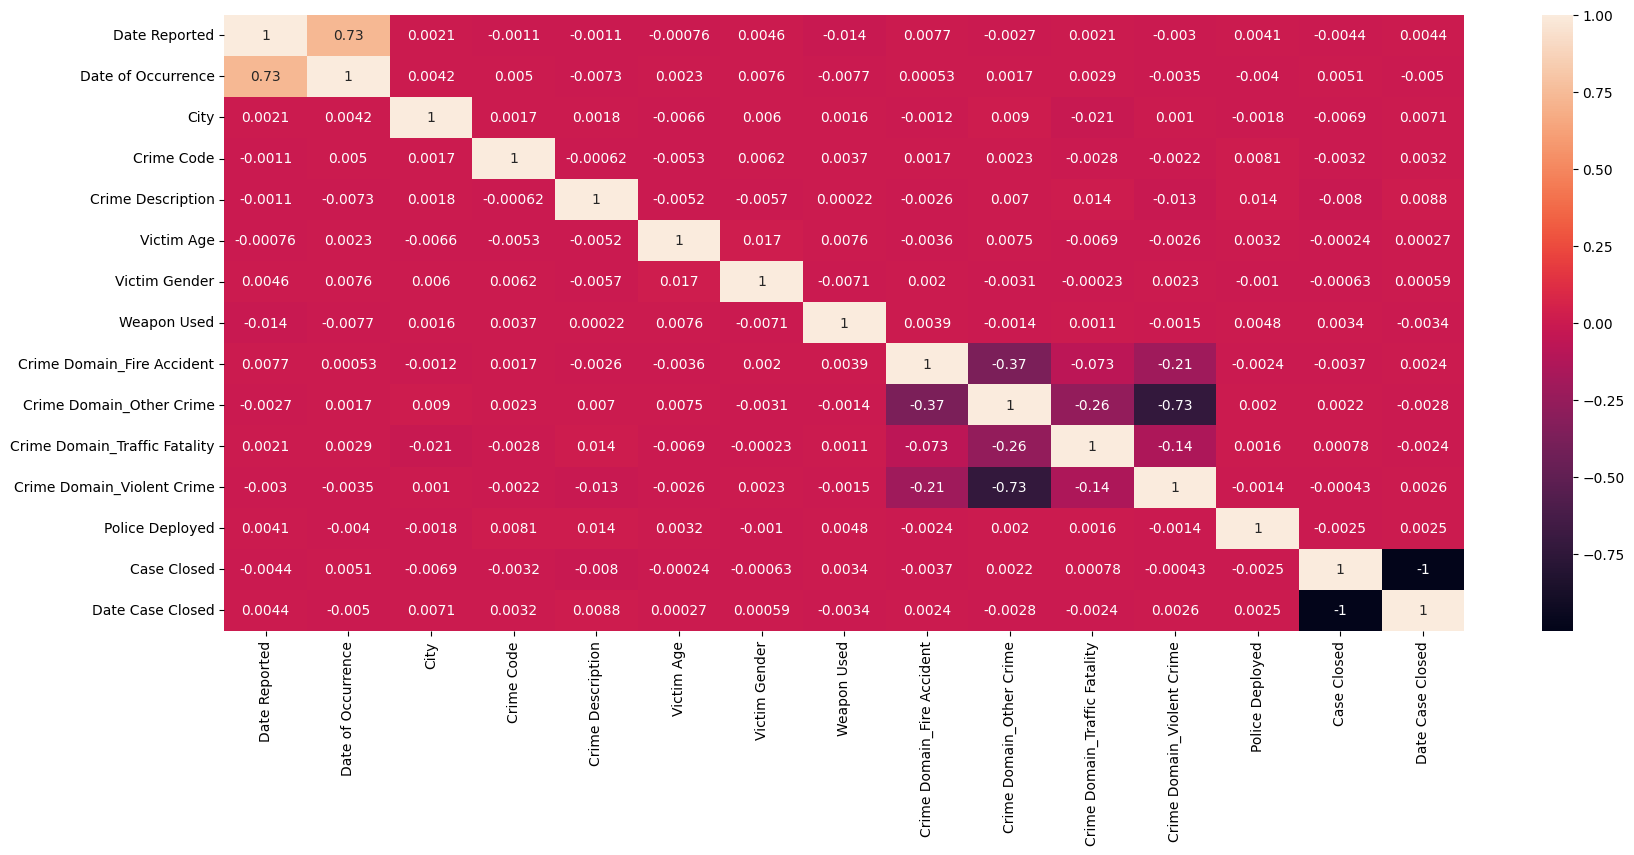

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(dataset.corr(),annot=True)

In [61]:
dataset=dataset.drop(columns=['Case Closed','Crime Domain_Violent Crime'])

<Axes: >

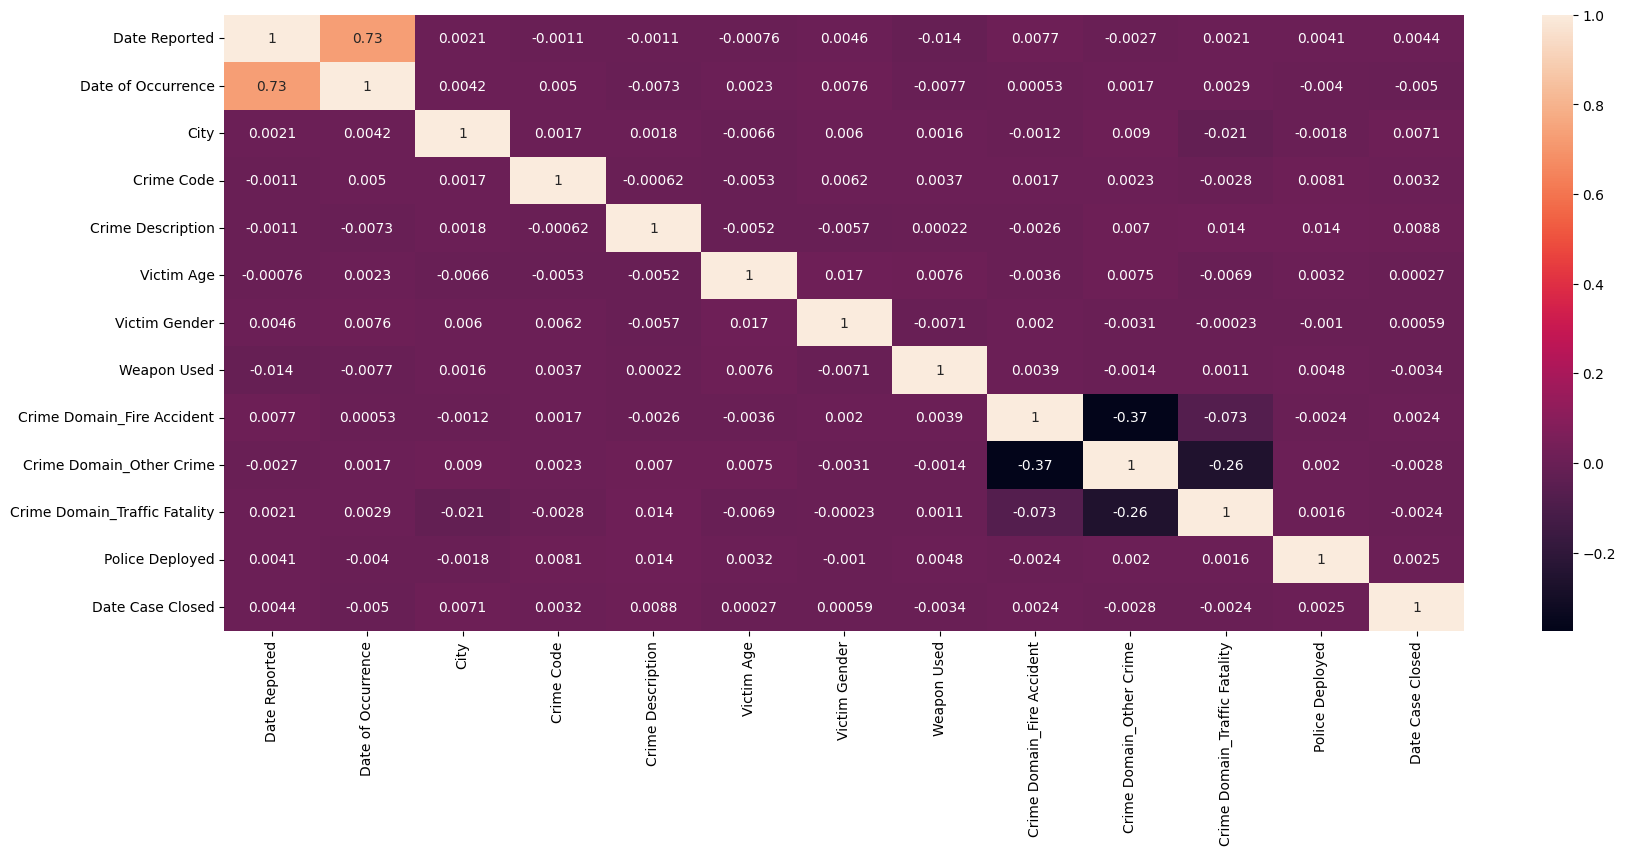

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(dataset.corr(),annot=True)

In [63]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Police Deployed,Date Case Closed
0,-0.006878,-0.007287,1817,576,1918,16,1,5737,0.0,0.0,0.0,13,9999.0
1,-0.007269,-0.007288,2493,128,1909,37,1,5728,0.0,1.0,0.0,9,9999.0
2,-0.006851,-0.007288,761,271,1920,48,0,5737,0.0,1.0,0.0,15,9999.0
3,-0.007346,-0.007289,2212,170,1980,49,0,5643,0.0,1.0,0.0,1,119.0
4,-0.007258,-0.007289,2212,421,1975,30,0,5676,0.0,1.0,0.0,18,7.0


In [64]:
dataset.columns

Index(['Date Reported', 'Date of Occurrence', 'City', 'Crime Code',
       'Crime Description', 'Victim Age', 'Victim Gender', 'Weapon Used',
       'Crime Domain_Fire Accident', 'Crime Domain_Other Crime',
       'Crime Domain_Traffic Fatality', 'Police Deployed', 'Date Case Closed'],
      dtype='object')

In [65]:
for i in dataset.columns:
    print(i," ",dataset[i].min()," ",dataset[i].max())

Date Reported   -0.007374446002360596   0.007620456360664468
Date of Occurrence   -0.0072984450030854795   0.007587062854676433
City   320   5400
Crime Code   100   599
Crime Description   1859   1980
Victim Age   10   79
Victim Gender   0   2
Weapon Used   5643   11625
Crime Domain_Fire Accident   0.0   1.0
Crime Domain_Other Crime   0.0   1.0
Crime Domain_Traffic Fatality   0.0   1.0
Police Deployed   1   19
Date Case Closed   1.0   9999.0


In [66]:
from sklearn.preprocessing import StandardScaler,normalize
ss=StandardScaler()
# dataset['City']=ss.fit_transform(dataset[['City']])
# dataset['Weapon Used']=ss.fit_transform(dataset[['Weapon Used']])
# dataset['Date Case Closed']=ss.fit_transform(dataset[['Date Case Closed']])

dataset['City']=normalize(dataset[['City']])
dataset['Weapon Used']=normalize(dataset[['Weapon Used']])
dataset['Date Case Closed']=normalize(dataset[['Date Case Closed']])

In [67]:
dataset.head()

,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain_Fire Accident,Crime Domain_Other Crime,Crime Domain_Traffic Fatality,Police Deployed,Date Case Closed
0,-0.006878,-0.007287,1.0,576,1918,16,1,1.0,0.0,0.0,0.0,13,1.0
1,-0.007269,-0.007288,1.0,128,1909,37,1,1.0,0.0,1.0,0.0,9,1.0
2,-0.006851,-0.007288,1.0,271,1920,48,0,1.0,0.0,1.0,0.0,15,1.0
3,-0.007346,-0.007289,1.0,170,1980,49,0,1.0,0.0,1.0,0.0,1,1.0
4,-0.007258,-0.007289,1.0,421,1975,30,0,1.0,0.0,1.0,0.0,18,1.0


# PCA


In [68]:
pca2=PCA(n_components=2)
dataset=pca2.fit_transform(dataset)

In [69]:
df=dataset

In [70]:
dataset

array([[ 226.66138509,    5.25020384],
       [-221.35422393,   -3.93257191],
       [ -78.36241738,    7.04479622],
       ...,
       [  73.6282864 ,  -51.05762414],
       [ -38.3382719 ,    4.21000542],
       [-156.36285241,   19.04055497]])

In [71]:
dataset=pd.DataFrame(dataset,columns=['PCA1','PCA2'])

# DBSCAN

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(df)

In [73]:
if len(set(y_dbscan)) > 1 and -1 in y_dbscan:
    score = silhouette_score(df[y_dbscan != -1], y_dbscan[y_dbscan != -1])
    print("Silhouette Score (excluding noise):", score)
elif len(set(y_dbscan)) > 1:
    score = silhouette_score(df, y_dbscan)
    print("Silhouette Score:", score)
else:
    print("Only one cluster found or all noise — silhouette score not applicable.")

Silhouette Score (excluding noise): 0.9429779309489562


In [74]:
print("Cluster Counts:", pd.Series(y_dbscan).value_counts())

Cluster Counts: -1       30501
 121        15
 278        15
 8          15
 754        15
         ...  
 1197        3
 1181        3
 1141        3
 1487        3
 1298        3
Name: count, Length: 1563, dtype: int64


In [75]:
print(len(pd.Series(y_dbscan).value_counts()))

1563


# K-Means

In [76]:
from sklearn.cluster import KMeans
wcss=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=10)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

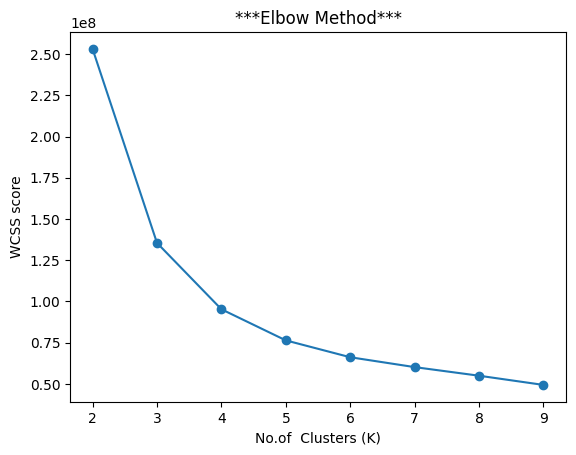

In [77]:
plt.plot(range(2,10),wcss,marker='o')
plt.xlabel("No.of  Clusters (K)")
plt.ylabel("WCSS score")
plt.title("***Elbow Method***")
plt.show()

In [78]:
kmean=KMeans(n_clusters=4,n_init=10,random_state=10)
y_kmean=kmean.fit_predict(dataset)
print(silhouette_score(dataset,y_kmean))

0.45022446288632556


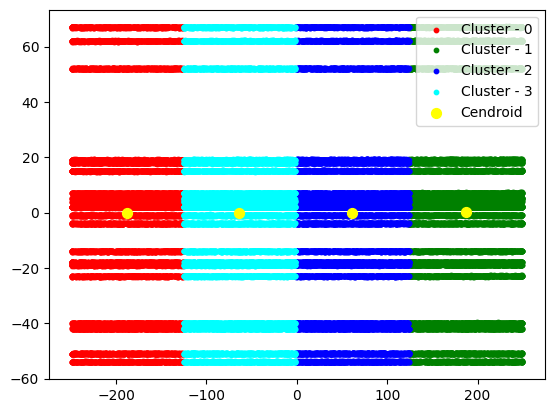

In [79]:
plt.scatter(dataset.loc[y_kmean==0,'PCA1'],dataset.loc[y_kmean==0,'PCA2'],s=10,c="red",label="Cluster - 0")
plt.scatter(dataset.loc[y_kmean==1,'PCA1'],dataset.loc[y_kmean==1,'PCA2'],s=10,c="green",label="Cluster - 1")
plt.scatter(dataset.loc[y_kmean==2,'PCA1'],dataset.loc[y_kmean==2,'PCA2'],s=10,c="blue",label="Cluster - 2")
plt.scatter(dataset.loc[y_kmean==3,'PCA1'],dataset.loc[y_kmean==3,'PCA2'],s=10,c="cyan",label="Cluster - 3")
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=50,c="yellow",label="Cendroid")
plt.legend()
plt.show()

# Now, the optimal number of clusters is 4.

# AgglomerativeClustering

In [80]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=4,linkage="ward")
y_pred=ac.fit_predict(df)

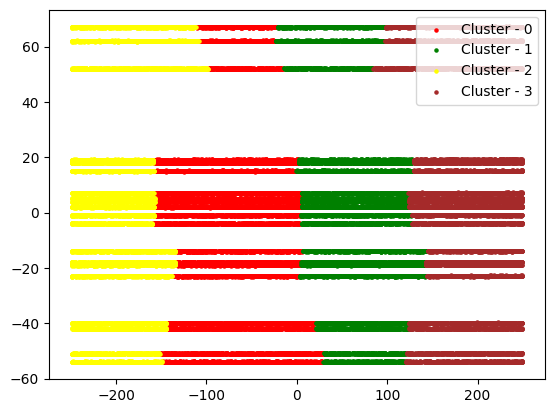

In [81]:
plt.scatter(df[y_pred==0,0],df[y_pred==0,1],s=5,c="red",label="Cluster - 0")
plt.scatter(df[y_pred==1,0],df[y_pred==1,1],s=5,c="green",label="Cluster - 1")
plt.scatter(df[y_pred==2,0],df[y_pred==2,1],s=5,c="yellow",label="Cluster - 2")
plt.scatter(df[y_pred==3,0],df[y_pred==3,1],s=5,c="brown",label="Cluster - 3")
plt.legend()
plt.show()